1. Load data

In [0]:
import csv
import numpy as np

train_x = []
train_y = []

test_x = []
test_y = []

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        train_x.append([i[0], i[1], i[2]])
        train_y.append([i[3]])
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        test_x.append([i[0], i[1], i[2]])
        test_y.append([i[3]])
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1


- load then make train, test data set
- train_x , test_x $\in$ $N * R^3$
- train_y , test_y $\in$ $N * R^1$

In [0]:
train_x = np.asarray(train_x).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)

test_x = np.asarray(test_x).astype(np.float32)
test_y = np.asarray(test_y).astype(np.float32)

- convert from array to np.ndarray

---
2. Linear regression

In [0]:
def hypothesis(theta_0, theta_1, theta_2, theta_3, X):
  """
  params
  if train_x (x, y, z) is input, it returns hypothesis of thetas
  theta_0 : scalar 
  theta_1 : scalar
  theta_2 : scalar
  theta_3 : scalar
  X       : matrix : [300, 3]
  return [300, ]
  """
  ret = theta_0 + theta_1 * X[:, 0] + theta_2 * X[:, 1] + theta_3 * X[:, 2] 
  # print(ret.shape)
  return ret 

- make linear model which has 3 params and input X which contains x, y, z.

In [0]:
def l2_loss (h_hat, h):
  m = len(h) # 300, 1

  # print("h's shape : ", h.shape) # (300, )
  # print("h_hat's shape : ", h_hat.shape) # (300, )
  
  ret = np.sum((h_hat - h)*(h_hat - h)) / (2*m)
  return ret

- make l2 loss for $h$ and $\hat{h}$

In [0]:
def gradient_descent(X, Y, theta_0, theta_1, theta_2, theta_3, learning_rate=1e-7):
  """
  X : [300, 3] ndarray - the train x data
  Y : [300, 1] ndarrat - the train y data
  """

  m = len(x)  
  
  gradient_theta_0 = np.sum(hypothesis(theta_0, theta_1, theta_2, theta_3, X) - Y.squeeze()) / m
  gradient_theta_1 = np.sum((hypothesis(theta_0, theta_1, theta_2, theta_3, X) - Y.squeeze()) * X[:, 0]) / m
  gradient_theta_2 = np.sum((hypothesis(theta_0, theta_1, theta_2, theta_3, X) - Y.squeeze()) * X[:, 1]) / m
  gradient_theta_3 = np.sum((hypothesis(theta_0, theta_1, theta_2, theta_3, X) - Y.squeeze()) * X[:, 2]) / m

  # print("gd : ", gradient_theta_0)

  new_theta_0 = theta_0 - learning_rate * gradient_theta_0
  new_theta_1 = theta_1 - learning_rate * gradient_theta_1
  new_theta_2 = theta_2 - learning_rate * gradient_theta_2
  new_theta_3 = theta_3 - learning_rate * gradient_theta_3

  return new_theta_0, new_theta_1, new_theta_2, new_theta_3

- make gradient descent algorithm for multi variable

In [0]:
# initialize thetas arbitrarily
theta_0 = 30
theta_1 = -220
theta_2 = -110
theta_3 = -230

theta_0_list = []
theta_1_list = []
theta_2_list = []
theta_3_list = []
loss_list = []
test_loss_list = []

# until converge about 1000 steps
converge_step = 1000
for i in range(converge_step):
  h_hat = hypothesis(theta_0, theta_1, theta_2, theta_3, train_x)
  loss = l2_loss(train_y[:, 0], h_hat)
  loss_list.append(loss)

  h_hat_for_test = hypothesis(theta_0, theta_1, theta_2, theta_3, test_x)
  loss_for_test = l2_loss(test_y[:, 0], h_hat_for_test)
  test_loss_list.append(loss_for_test)

  theta_0_list.append(theta_0)
  theta_1_list.append(theta_1)
  theta_2_list.append(theta_2)
  theta_3_list.append(theta_3)
  theta_0, theta_1, theta_2, theta_3 = gradient_descent(train_x, train_y, theta_0, theta_1, theta_2, theta_3)
  

- initialize thetas arbitrarily and linear regeress for multi-variables
- using the gradient descent algorithm
- converge step is 1000

---
3. plot the estimated parameters using the training dataset

In [0]:
import matplotlib.pyplot as plt
x_ = np.arange(converge_step)

- define x_ to plot along with steps

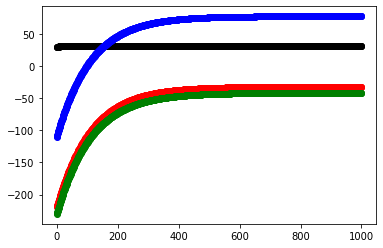

In [170]:
plt.scatter(x_, theta_0_list, c='k')
plt.scatter(x_, theta_1_list, c='r')
plt.scatter(x_, theta_2_list, c='b')
plt.scatter(x_, theta_3_list, c='g')
plt.show()

- plotting estimated parameters

---
4.  plot the training error

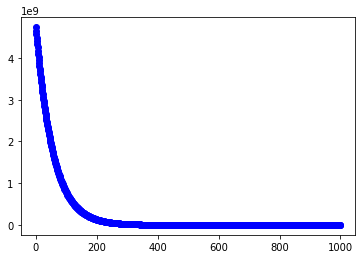

In [171]:
plt.scatter(x_, loss_list, c='b')
plt.show()

- plot the training error

--- 
5. plot the test error


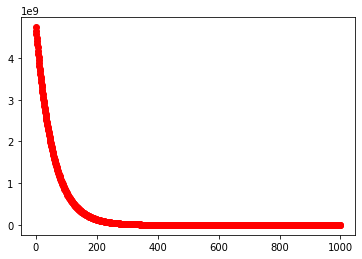

In [172]:
plt.scatter(x_, loss_list, c='r')
plt.show()

- plot the testing error